# 首先安装相关包，使用pip install jieba 即可


In [9]:
# encoding=utf-8#
import jieba
# 手动复制145规划内容，存入txt，下面打开
with open('145.txt','r',encoding='utf-8') as f:
    gov=f.read()
# jieba.load_userdict(r'C:\Users\12436\Desktop\课件\2021春\舆情\3\stopword.txt')
seg_list=jieba.cut(gov,cut_all=False)#使用jieba的精确模式进行分词
# print(list(seg_list))
#词频统计
tf={}
for seg in seg_list:
    if seg in tf:
        tf[seg]+=1
    else:
        tf[seg]=1
print(len(tf))

4894


In [32]:
ci=list(tf.keys())
# print(ci)
#加载停用词字典：用于下面删除相关词语，可以手动在stopword.txt内加入你想删除的词语
with open(r'C:\Users\12436\Desktop\课件\2021春\舆情\3\stopword.txt','r',encoding='utf-8') as ft:
    stopword=ft.read()
for seg in ci:
    if tf[seg]<10 or len(seg)<2 or seg in stopword or '一' in seg:
        tf.pop(seg)
print(len(tf))

398


# 处理词语，并记录词频

In [35]:
ci=list(tf.keys())
num=list(tf.values())
data=[]
for i in range(len(tf)):
    data.append((num[i],ci[i]))
data.sort()
data.reverse()
print(data)

[(460, '发展'), (349, '建设'), (276, '完善'), (250, '体系'), (247, '推进'), (176, '健全'), (173, '推动'), (168, '制度'), (167, '国家'), (159, '机制'), (157, '提升'), (153, '加快'), (151, '实施'), (139, '创新'), (133, '服务'), (124, '提高'), (116, '支持'), (115, '经济'), (110, '政策'), (107, '能力'), (101, '社会'), (101, '治理'), (101, '产业'), (100, '保护'), (99, '保障'), (94, '改革'), (92, '深化'), (92, '强化'), (91, '战略'), (91, '优化'), (90, '构建'), (86, '领域'), (85, '重点'), (83, '规划'), (82, '文化'), (80, '生态'), (78, '企业'), (76, '合作'), (75, '国际'), (74, '管理'), (74, '科技'), (71, '资源'), (71, '水平'), (68, '城市'), (66, '区域'), (65, '市场'), (65, '农业'), (63, '教育'), (63, '建立'), (62, '地区'), (61, '公共服务'), (58, '第二节'), (58, '监管'), (58, '基础'), (58, '中国'), (56, '技术'), (56, '基础设施'), (55, '社会主义'), (54, '数字'), (53, '现代化'), (52, '增强'), (51, '开放'), (50, '环境'), (49, '综合'), (48, '政府'), (48, '就业'), (47, '风险'), (47, '统筹'), (47, '农村'), (46, '绿色'), (46, '第三节'), (46, '协调'), (45, '鼓励'), (45, '高质量'), (45, '持续'), (45, '工程'), (44, '质量'), (44, '融合'), (44, '布局'), (43, '生产'), (43, 

# 将词频存入result.txt中

In [37]:
f=open("result.txt",'w',encoding='utf-8')
for i in range(len(data)):
    f.write(data[i][1]+","+str(data[i][0])+"\r\n")
f.close()

# 生成词云图，安装包使用pip install wordcloud
font为字体

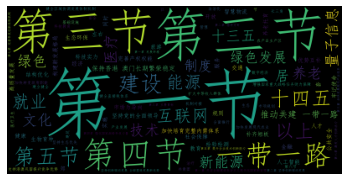

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=open('145.txt','r',encoding='utf-8').read()
font=r'c:\Windows\Fonts\simfang.ttf'
wc=WordCloud(font_path=font).generate(text)#generate()功能为生成文本
plt.imshow(wc)
plt.axis('off')
plt.show()
# print(dir(WordCloud))

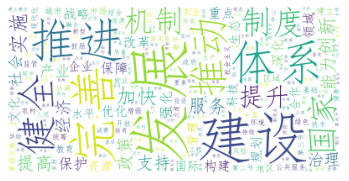

In [52]:
wcdata={}
for d in data:
    wcdata[d[1]]=d[0]
# print(wcdata)
wc2=WordCloud(font_path=font,background_color='white').generate_from_frequencies(wcdata)
plt.imshow(wc2)
plt.axis('off')
plt.show()
wc2.to_file('2.png')

In [53]:
import os
print(os.getcwd())

C:\Users\12436\yuqing


In [55]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator

# 生成形状词云图，导入相关图片即可

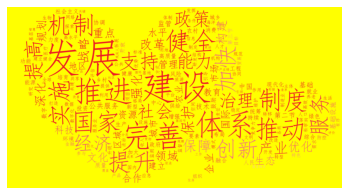

In [59]:
mask=np.array(Image.open('heart.png'))
image_colors=ImageColorGenerator(mask)
wc3=WordCloud(font_path=font,background_color='yellow',mask=mask).generate_from_frequencies(wcdata)


#plt.imshow(wc)
plt.imshow(wc3.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc3.to_file('145.jpg')